In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Documents/diabetes.csv")
df.head(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


In [3]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [4]:
data_sf = df.drop(['DiabetesPedigreeFunction','BloodPressure','SkinThickness'], axis = 1)
data_sf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

<Axes: xlabel='Insulin'>

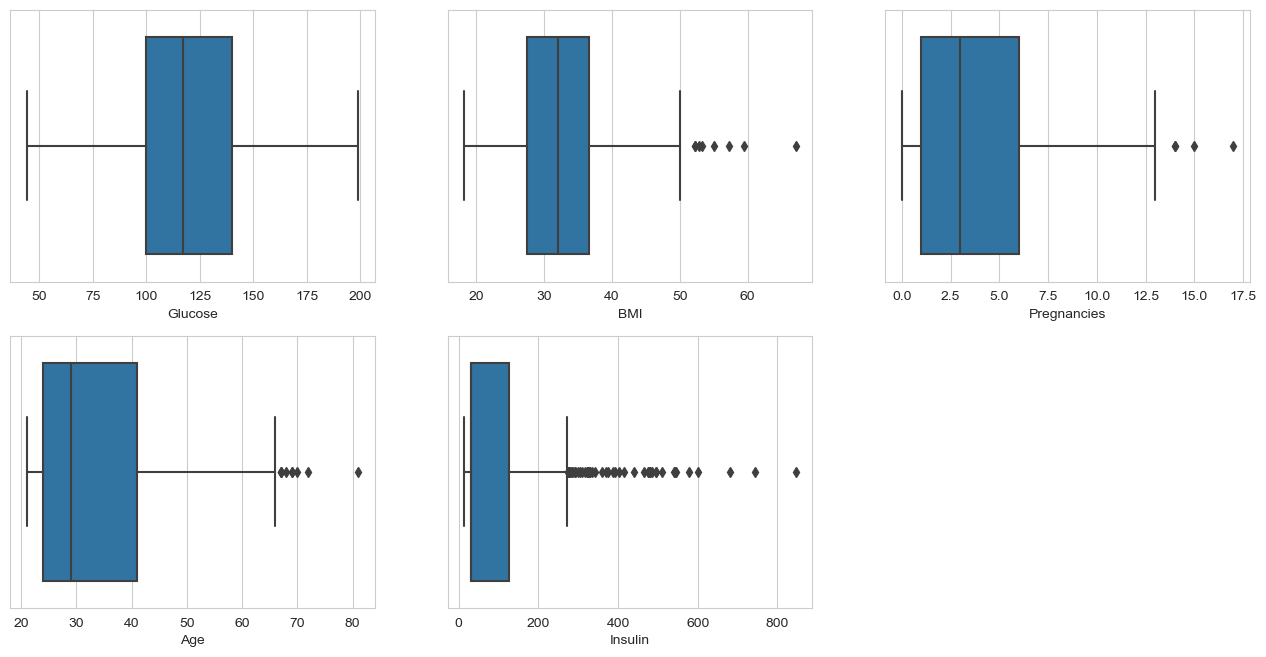

In [5]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_sf['Glucose'],data=data_sf)
plt.subplot(3,3,2)
sns.boxplot(x=data_sf['BMI'],data=data_sf)
plt.subplot(3,3,3)
sns.boxplot(x=data_sf['Pregnancies'],data=data_sf)
plt.subplot(3,3,4)
sns.boxplot(x=data_sf['Age'],data=data_sf)
plt.subplot(3,3,5)
sns.boxplot(x=data_sf['Insulin'],data=data_sf)

In [6]:
from sklearn.preprocessing import QuantileTransformer

x=data_sf

quantile  = QuantileTransformer()
X = quantile.fit_transform(x)

df1=quantile.transform(X)
df1=pd.DataFrame(X)
df1.columns =['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']

C:\Users\aida-lab\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\aida-lab\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


<Axes: xlabel='Insulin'>

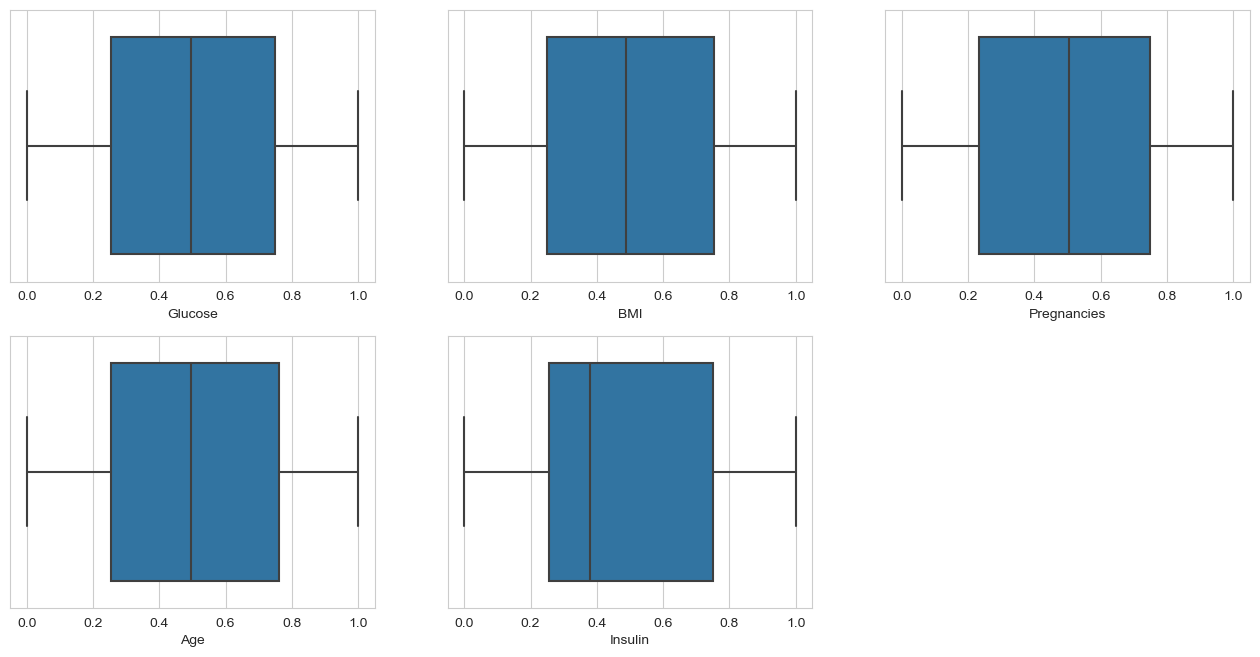

In [7]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df1['Glucose'],data=df1)

plt.subplot(3,3,2)
sns.boxplot(x=df1['BMI'],data=df1)
plt.subplot(3,3,3)
sns.boxplot(x=df1['Pregnancies'],data=df1)
plt.subplot(3,3,4)
sns.boxplot(x=df1['Age'],data=df1)
plt.subplot(3,3,5)
sns.boxplot(x=df1['Insulin'],data=df1)

### Phase 1

In [8]:
df2 = df1.sample(frac=.50)
df2.shape

(384, 6)

In [9]:
df2

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
132,0.503259,0.909387,0.910691,0.652542,0.529335,1.0
456,0.232725,0.703390,0.256193,0.216428,0.971317,0.0
243,0.747718,0.517601,0.846154,0.228162,0.606258,1.0
368,0.503259,0.058018,0.582790,0.248370,0.128422,0.0
91,0.596480,0.575619,0.846154,0.487614,0.626467,0.0
...,...,...,...,...,...,...
662,0.863755,0.899609,0.917210,0.788787,0.808344,1.0
444,0.596480,0.495437,0.256193,0.355280,0.529335,1.0
542,0.940678,0.135593,0.256193,0.673403,0.937419,1.0
500,0.387223,0.495437,0.597132,0.153194,0.000000,0.0


In [10]:
X = df2.drop(['Outcome'],axis = 1)
y = df2['Outcome']

In [11]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age
132,0.503259,0.909387,0.910691,0.652542,0.529335
456,0.232725,0.703390,0.256193,0.216428,0.971317
243,0.747718,0.517601,0.846154,0.228162,0.606258
368,0.503259,0.058018,0.582790,0.248370,0.128422
91,0.596480,0.575619,0.846154,0.487614,0.626467


In [12]:
y.head()

132    1.0
456    0.0
243    1.0
368    0.0
91     0.0
Name: Outcome, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

KNN = KNeighborsClassifier
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

from sklearn import metrics
KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)

print("Accuracy 1:", KNN_accuracy)

Accuracy 1: 0.7662337662337663


### Phase 2

In [15]:
df3 = df1.sample(frac=.50)
df3.shape

(384, 6)

In [24]:
df3

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
214,0.907432,0.436767,0.842243,0.630378,0.659713,1.0
348,0.503259,0.238592,0.603651,0.037810,0.368970,0.0
506,0.000000,0.943937,0.649935,0.746415,0.642112,1.0
519,0.747718,0.655150,0.962190,0.013038,0.962190,0.0
228,0.596480,0.996089,0.998696,0.756193,0.558670,0.0
...,...,...,...,...,...,...
185,0.809648,0.985007,0.256193,0.726206,0.762060,1.0
81,0.387223,0.026728,0.256193,0.487614,0.128422,0.0
744,0.989570,0.833116,0.781617,0.885267,0.722947,0.0
120,0.000000,0.876793,0.679922,0.994785,0.316167,1.0


In [16]:
X2 = df3.drop(['Outcome'],axis = 1)
y2 = df3['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 

KNN = KNeighborsClassifier
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

from sklearn import metrics
KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)

print("Accuracy 2:", KNN_accuracy)

Accuracy 2: 0.7142857142857143


### Phase 3

In [19]:
df4 = df1.sample(frac=.50)
df4.shape

(384, 6)

In [23]:
df4

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
657,0.232725,0.532595,0.887223,0.835724,0.762060,0.0
27,0.232725,0.217731,0.781617,0.074316,0.128422,0.0
363,0.596480,0.792699,0.256193,0.824641,0.990874,1.0
263,0.503259,0.760104,0.256193,0.516297,0.976532,0.0
429,0.232725,0.192960,0.853977,0.680574,0.808344,1.0
...,...,...,...,...,...,...
617,0.387223,0.011734,0.001304,0.018253,0.200130,0.0
137,0.000000,0.170795,0.656454,0.309648,0.128422,0.0
246,0.940678,0.561930,0.256193,0.443937,0.762060,0.0
418,0.232725,0.069752,0.256193,0.000000,0.411995,0.0


In [20]:
X3 = df4.drop(['Outcome'],axis = 1)
y3 = df4['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

KNN = KNeighborsClassifier
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

from sklearn import metrics
KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)

print("Accuracy 2:", KNN_accuracy)

Accuracy 2: 0.7662337662337663
